<a href="https://colab.research.google.com/github/z2ujack/d2l-pytorch/blob/2017320248-%EC%BB%B4%ED%93%A8%ED%84%B0%ED%95%99%EA%B3%BC-%EC%9D%B4%EB%AF%BC%EC%84%B1-patch-1/Deep_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep Learning Project
#Min Sung, Rhee 2017320248 Computer Science

#Initial Configurations

In [1]:
#Clone data from d2l repository for any libraries thats being used

from google.colab import drive
root = '/content/drive/'
drive.mount(root)

%cd '/content/drive/MyDrive/Colab Notebooks'

!git clone https://github.com/MLman/d2l-pytorch.git
%cd /content/drive/MyDrive/Colab Notebooks/d2l-pytorch/d2l

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/Colab Notebooks
fatal: destination path 'd2l-pytorch' already exists and is not an empty directory.
/content/drive/MyDrive/Colab Notebooks/d2l-pytorch/d2l


In [2]:
#Check the the current working directory
import os

print(os.getcwd())

/content/drive/MyDrive/Colab Notebooks/d2l-pytorch/d2l


#Preprocessing

In [3]:
#Get all the required libraries

import sys
#allow to import other python files in directory
sys.path.insert(0,'../')

import torch
import d2l
import torch.nn as nn
import torch.optim as optim
import time
import numpy as np

#Get dataset from CIFAR10
import torchvision as tv
from torchvision.datasets import CIFAR10 as cifar10
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

#convert to grayscale
import cv2

#Set hyperparameters
batch_size = 256
learning_rate = 0.0002

In [4]:
#The data must be transformed while processing. Normalization is used to make the data range from [-1,1], note that grayscale images are 1-dimensional which ranges from 0-255
#However, 3 channels have been chosen so that CNN could run effectively
#We define a function for this appropriately

def preprocess(batch,num_channel=3, rgb=True):
  arr1= [transforms.Grayscale(num_channel),transforms.ToTensor(), 
                                    transforms.Normalize((0.5), (0.5))]
  arr2=[transforms.Grayscale(num_channel),transforms.ToTensor(), 
                                    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))]
  arr3 = [transforms.ToTensor(), 
                                    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))]
  if rgb==False:
    if num_channel==1:
      data_transform  = transforms.Compose(arr1)
    else:
      data_transform  = transforms.Compose(arr2)
  else:
    data_transform  = transforms.Compose(arr3)
  X_train = cifar10("./",train=True, transform = data_transform, download=True)
  X_test = cifar10("./",train=False, transform = data_transform, download=True)

  train_loader = DataLoader(X_train, batch_size = batch,
                                           shuffle = True, num_workers = 0, drop_last = True)
  test_loader = DataLoader(X_test, batch_size = batch,
                                           shuffle = False, num_workers = 0, drop_last = True)
  return train_loader,test_loader

#Classes in cifar10
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

#ResNet34 model

##Grayscale images

Initially, the plan was to use ResNet50 model to train grayscale images. However, the key issue with this approach is that input RGB images have 3 channels (R,G,B) but grayscale images only have 1 channel. The common practice known is to consider 3 identical grayscale channels as inputs.

In [5]:
train_loader,test_loader = preprocess(batch_size,num_channel=3,rgb=False)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet34', pretrained=True)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [7]:
#Check cuda is available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f'{device} is available')

cuda:0 is available


In [8]:
#Define Loss function and Optimizer (For this project I will be using stochastic gradient descent with constant lr= 0.001, momentum = 0.9)

model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

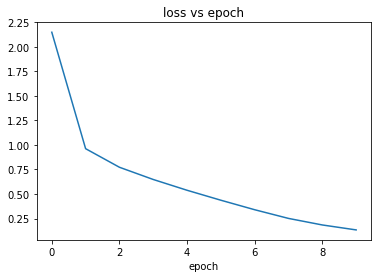

194.08516097068787


In [9]:
#Define a function to print the training result
def training(train_load,model):
  loss_function = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(),lr=0.001,momentum = 0.9)
  model.train()
  loss_epoch = []
  n = len(train_load)
  for epoch in range(10):
    total_loss = 0
    for index, (data, target) in enumerate(train_load):
      
      data , target = data.to(device),target.to(device)
      optimizer.zero_grad()
      output = model(data)
      loss = loss_function(output,target)
      loss.backward()
      optimizer.step()
    
      total_loss+=loss.item()
    loss_epoch.append(total_loss/n)

  plt.plot(loss_epoch)
  plt.title('loss vs epoch')
  plt.xlabel('epoch')
  plt.show()

start = time.time()
training(train_loader,model)
end = time.time()
print(end-start)

In [10]:
#Validation
def test(test_load,model):
  correct =0
  total = 0
  with torch.no_grad():
    for image, label in test_load:
      x = image.to(device)
      y_ = label.to(device)
      output = model.forward(x)
      _,ans = torch.max(output,1)
      total+=label.size(0)
      correct+=(ans==y_).sum().float()
  print("Accuracy of Test Data : {}".format(100*correct/total))

start = time.time()
test(test_loader,model)
end = time.time()
print(end-start)

Accuracy of Test Data : 72.16546630859375
3.208993434906006


##For normal RGB models

In [11]:
train_loader,test_loader = preprocess(batch_size,num_channel=3,rgb=True)

Files already downloaded and verified
Files already downloaded and verified


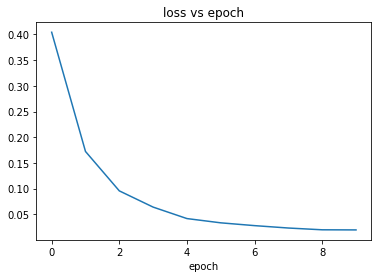

150.8456575870514


In [12]:
start = time.time()
training(train_loader,model)
end = time.time()
print(end-start)

In [13]:
test(test_loader,model)

Accuracy of Test Data : 75.73117065429688


Conclusion: RGB models are slightly better. Hence, it may be due to information loss.

##Grayscale with input 1 channel

For achieving this, we need to slightly modify the ResNet model by having the first convolutional layer to recept one input channel instead of 3 which the library requests.

In [14]:
#Modification
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

In [15]:
train_loader,test_loader = preprocess(batch_size,num_channel=1,rgb=False)

Files already downloaded and verified
Files already downloaded and verified


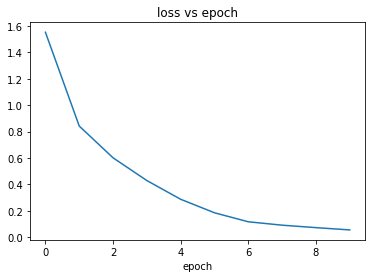

In [16]:
model.to(device)
training(train_loader,model)

In [17]:
test(test_loader,model)

Accuracy of Test Data : 71.27404022216797


Not Suitable for image classification because the accuracy is way lower.

To conclude for ResNet50 model, the RGB processed images have better performance than grayscale preprocessed images for image classification

#**ResNet50** model

In [18]:
model_2 = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
model_2.to(device)
model.to(device)
model_2.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

##Grayscale images

Files already downloaded and verified
Files already downloaded and verified


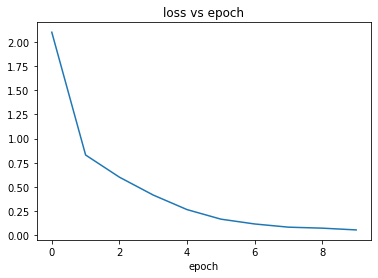

Accuracy of Test Data : 72.12540435791016


In [19]:
train_loader,test_loader = preprocess(batch_size,num_channel=3,rgb=False)

training(train_loader,model_2)
test(test_loader,model_2)

##RGB images

Files already downloaded and verified
Files already downloaded and verified


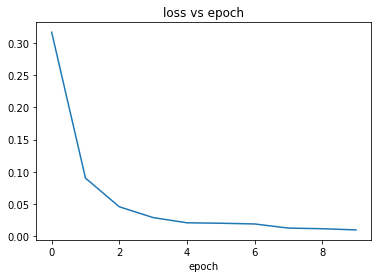

Accuracy of Test Data : 76.03165435791016


In [20]:
train_loader,test_loader = preprocess(batch_size,num_channel=3,rgb=True)

training(train_loader,model_2)
test(test_loader,model_2)

##1 channel Grayscale

Files already downloaded and verified
Files already downloaded and verified


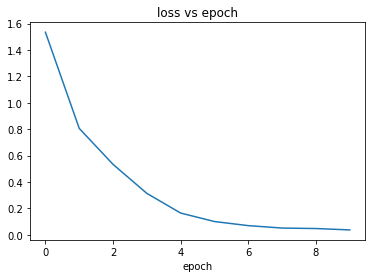

Accuracy of Test Data : 71.33413696289062


In [28]:
train_loader,test_loader = preprocess(batch_size,num_channel=1,rgb=False)
model_2.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
model_2.to(device)
training(train_loader,model_2)
test(test_loader,model_2)

#**ResNet101** model

In [21]:
model_3 = torch.hub.load('pytorch/vision:v0.10.0', 'resnet101', pretrained=True)
model_3.to(device)
model_3.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

##Grayscale images

Files already downloaded and verified
Files already downloaded and verified


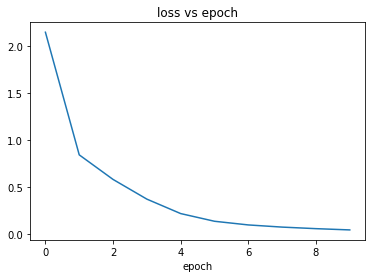

Accuracy of Test Data : 73.046875


In [22]:
train_loader,test_loader = preprocess(batch_size,num_channel=3,rgb=False)

training(train_loader,model_3)
test(test_loader,model_3)

##RGB images

Files already downloaded and verified
Files already downloaded and verified


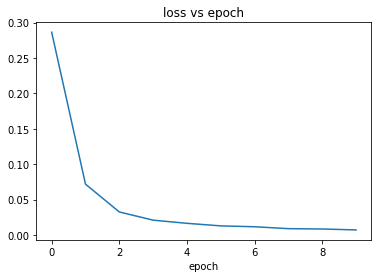

Accuracy of Test Data : 75.14022827148438


In [23]:
train_loader,test_loader = preprocess(batch_size,num_channel=3,rgb=True)

training(train_loader,model_3)
test(test_loader,model_3)

##1 channel Grayscale

Files already downloaded and verified
Files already downloaded and verified


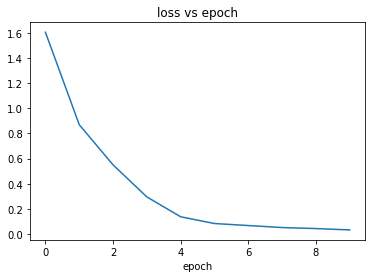

Accuracy of Test Data : 70.69310760498047


In [29]:
train_loader,test_loader = preprocess(batch_size,num_channel=1,rgb=False)
model_3.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
model_3.to(device)
training(train_loader,model_3)
test(test_loader,model_3)

#**ResNet152** model

In [31]:
model_4 = torch.hub.load('pytorch/vision:v0.10.0', 'resnet152', pretrained=True)
model_4.to(device)
model_4.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth


  0%|          | 0.00/230M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

##Grayscale images

Files already downloaded and verified
Files already downloaded and verified


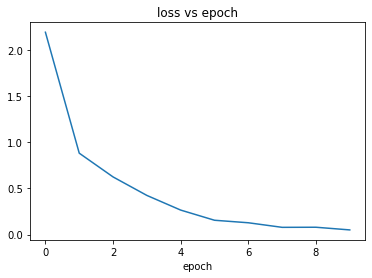

Accuracy of Test Data : 71.45433044433594


In [32]:
train_loader,test_loader = preprocess(batch_size,num_channel=3,rgb=False)

training(train_loader,model_4)
test(test_loader,model_4)

##RGB images

Files already downloaded and verified
Files already downloaded and verified


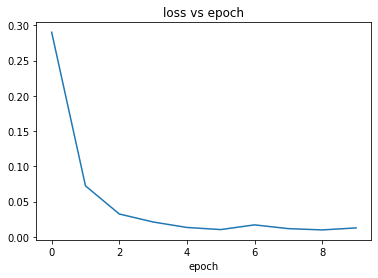

Accuracy of Test Data : 75.44070434570312


In [33]:
train_loader,test_loader = preprocess(batch_size,num_channel=3,rgb=True)

training(train_loader,model_4)
test(test_loader,model_4)

##1 channel Grayscale

Files already downloaded and verified
Files already downloaded and verified


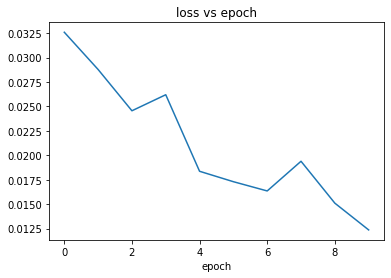

Accuracy of Test Data : 71.93509674072266


In [34]:
train_loader,test_loader = preprocess(batch_size,num_channel=1,rgb=False)
model_4.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
model_4.to(device)
training(train_loader,model_2)
test(test_loader,model_2)

#**VGGnet 16** model

In [35]:
model_5 = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16', pretrained=True)
model_5.to(device)
model_5.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

##Grayscale images

Files already downloaded and verified
Files already downloaded and verified


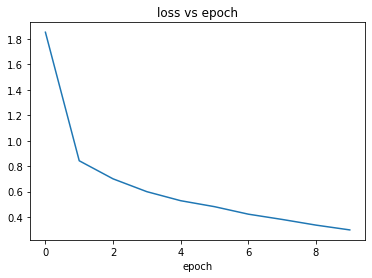

Accuracy of Test Data : 82.33173370361328


In [36]:
train_loader,test_loader = preprocess(batch_size,num_channel=3,rgb=False)

training(train_loader,model_5)
test(test_loader,model_5)

##RGB images

Files already downloaded and verified
Files already downloaded and verified


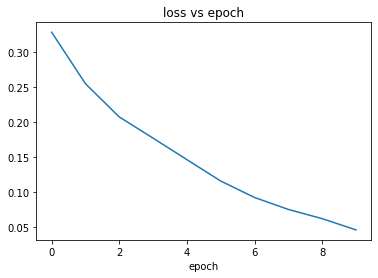

Accuracy of Test Data : 85.53685760498047


In [37]:
train_loader,test_loader = preprocess(batch_size,num_channel=3,rgb=True)

training(train_loader,model_5)
test(test_loader,model_5)